`Programmed By : Rithik Tripathi`

[Connect with me on Linkedin](https://www.linkedin.com/in/rithik-tripathi-data-scientist/)


# Regularisation Techniques : Lasso (L1) & Ridge(L2)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

> we will make a dataframe which could mimic a Sine curve

In [2]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
#Setting seed for reproducability
np.random.seed(10)  

In [4]:
#Defining the target/dependent variable as sine of the independent variable

# y = sin(x) + SOME NOISE BEING ADDED ON TOP OF IT
y_sin_noise = np.sin(x) + np.random.normal(0,0.15,len(x))
y_pure_sin = np.sin(x)

del_y = y_sin_noise - y_pure_sin

In [5]:
#Creating the dataframe using independent and dependent variable
sin_df = pd.DataFrame(np.column_stack([x,y_sin_noise]),columns=['x','y'])
sin_df.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


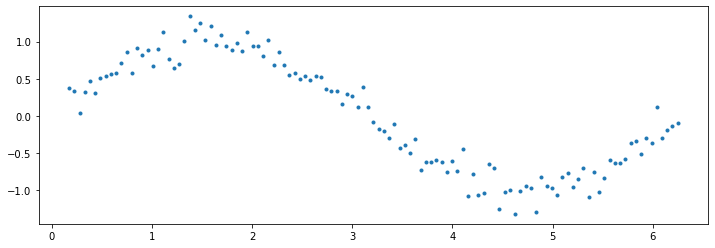

In [6]:
# sine curve with noise added 

#Plotting the dependent and independent variables
plt.figure(figsize=(12,4))
plt.plot(sin_df['x'],sin_df['y'],'.')

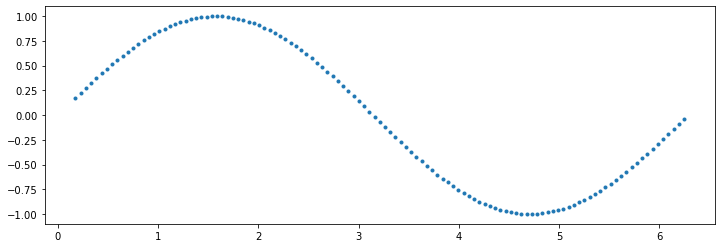

In [7]:
# this is how the pure sine column plot appears : without noise

#Plotting the dependent and independent variables
plt.figure(figsize=(12,4))
plt.plot(sin_df['x'],y_pure_sin,'.')

In [8]:
# using polynomial regression from power 1 to 15
for i in range(2,16): #power of 1 is already there, hence starting with 2
    col_name = 'x_%d'%i # generating column name with the respective power 
    sin_df[col_name] = sin_df['x']**i
    
sin_df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating Train & Test set Randomly

In [9]:
sin_df['y_pure_sin'] = y_pure_sin 

# allocating random int to each record and if it is <3 => train & >3 => test
# this is just a fancy way of doing train test split, nothing else
sin_df['randNumCol'] = np.random.randint(1, 6, sin_df.shape[0])
sin_df.head()
train=sin_df[sin_df['randNumCol']<=3]
test=sin_df[sin_df['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

### Implementing Linear regression

In [10]:
from sklearn.linear_model import LinearRegression

#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
y_sin_train = train['y_pure_sin'].values

X_test = test.drop('y', axis=1).values
y_test = test['y'].values
y_sin_test = test['y_pure_sin'].values

In [11]:
def check_features_vs_result(train_x, train_y, test_x, test_y, features, models_to_plot):
    
    '''
    Takes input train and test dataset, features and a dictionary with number of features to plot with respective plot location
    and returns train v/s test results plot to better understand the overfitting / underfitting results.
    
    Params : 
    	train_x : training data
        train_y : training target feature
        test_x : testing data
        test_y : testing target feature
        features : (int) number of features to consider while plotting 
        models_to_plot : dictionary : key -> number of features & value -> Plot location in subplot
        
    Returns : 
    	Respective train v/s test plot
    '''
    
    
    # fitting the model
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y)
    train_y_pred = lr.predict(train_x)
    test_y_pred = lr.predict(test_x)
    
    # checking features for which plot is to be made:
    if features in models_to_plot : 
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:, 0:1], train_y_pred)
        plt.plot(train_x[:, 0:1], train_y, '.')
        plt.title('Number of Predictors: %d'%features)
        
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    return_list = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    return_list.extend([rss_test])
        
    return_list.extend([lr.intercept_])
    return_list.extend(lr.coef_)
    
    return return_list
    
# Making DataFrame to store the results

col =  ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# defining a dictionary to store subpolot locations for respective number of features
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}


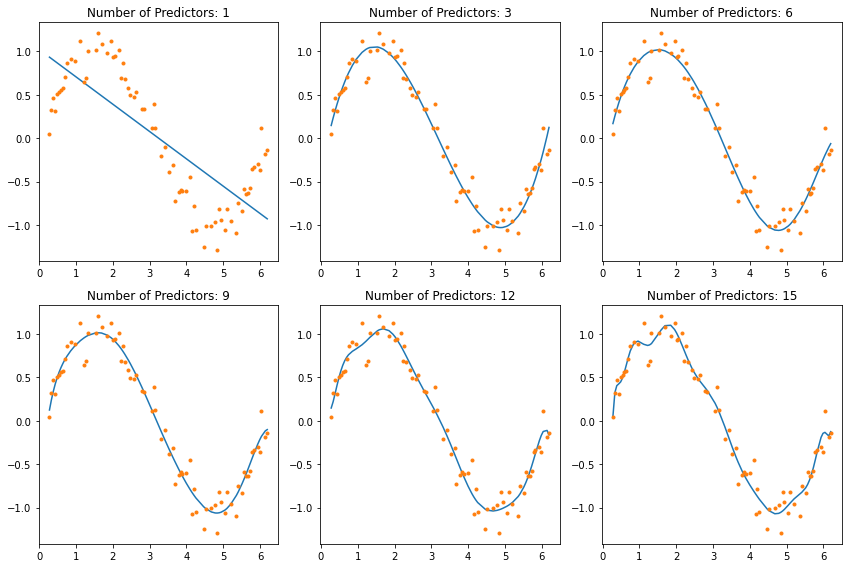

In [12]:
# Iterating through all powers of polynomial reg and storing results in the dataframe made above
plt.figure(figsize=(12,8))

for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    # row = i-1 because we need to start from 0th location
    # column = i+3 because there are somdefault columns like x and y axis
    coef_matrix_simple.iloc[i-1, 0:i+3] = check_features_vs_result(
    											train_x, train_y, test_x, test_y,
                                                features=i,
                                                models_to_plot=models_to_plot
    )

#### when the features were given more & more, the model got Overfitted and Learned the noise present in data as well.
### We can observe how the last plot is able to mimic the sine curve including noise perfectly

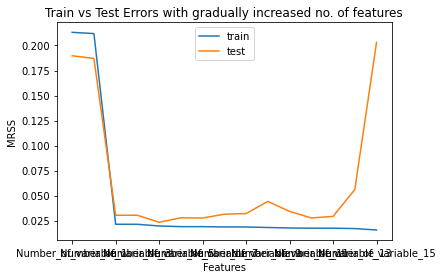

In [13]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.title('Train vs Test Errors with gradually increased no. of features')
plt.legend(['train', 'test'])

> The solution to avoid this is Regularisation

# Ridge Regularisation (L2)

in L2, We simply add `Square of Coefficients` to the regular `Cost Function`

In [14]:
# importing ridge from sklearn linear_model module
from sklearn.linear_model import Ridge

In [15]:
# list of various lambda/ Alpha i.e Learning Rates to try (to ensure the degree of control of Regularization)
learning_rate = [0, 1e-4, 1e-3, 1e-2, 1, 5]

In [16]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    # Fit the model
    ridge = Ridge(alpha= alpha, normalize= True)
    ridge.fit(train_x, train_y)
    train_pred = ridge.predict(train_x)
    test_pred = ridge.predict(test_x)
    
    # plotting results
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:, 0:1], train_pred) # predicted values
        plt.plot(train_x[:,0:1],train_y,'.') # actual values
        plt.title('Plot for alpha: %.3g'%alpha)
        
    #Return the result in pre-defined format
    mrss_train = sum((train_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridge.intercept_])
    ret.extend(ridge.coef_)
    
    return ret



In [17]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%learning_rate[i] for i in range(0,6)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

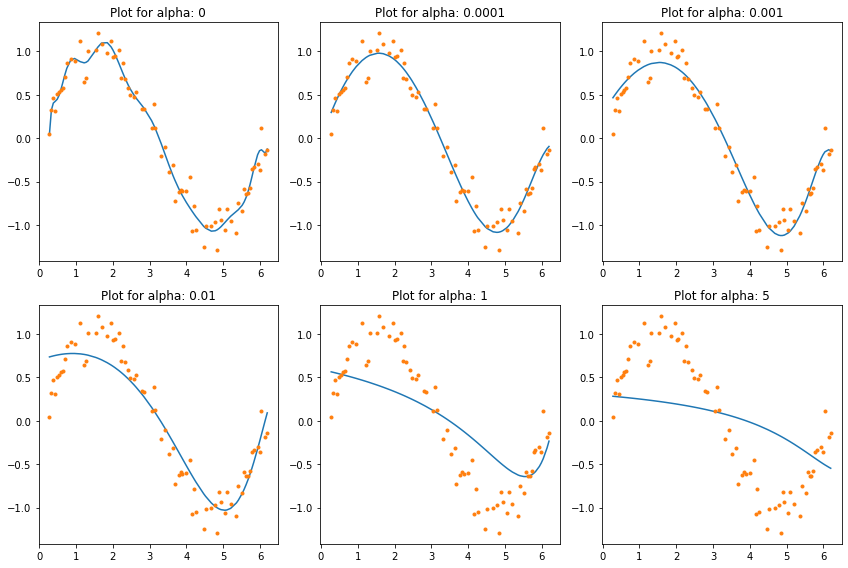

In [18]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i, alpha in enumerate(learning_rate):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot)

### Ridge Regression Results
> with `learning rate = 0` : There is no change in model, its same overfitted model, capturing noises

> with even a slight change in `learning rate =  1e-4` : the model is no longer capturing the noises and has learned the underlying relation of a sine curve

> with `increased learning rate`: model is gradually underfitting and eventually depecting a straight line

In [19]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_0.0001,0.02,0.026,-0.023,1.2,-0.36,-0.023,0.0016,0.00058,9e-05,9.4e-06,5.5e-07,-4.1e-08,-2e-08,-3.9e-09,-5.6e-10,-5.3e-11,9.2e-14,1.6e-12
alpha_0.001,0.028,0.034,0.28,0.72,-0.19,-0.021,-0.00068,0.00019,5.2e-05,9e-06,1.2e-06,1.4e-07,1.1e-08,1.8e-10,-2e-10,-6e-11,-1.3e-11,-2.3e-12
alpha_0.01,0.059,0.058,0.7,0.17,-0.075,-0.011,-0.00085,-1.7e-06,1.6e-05,4e-06,7.4e-07,1.1e-07,1.5e-08,1.7e-09,1e-10,-1.4e-11,-7.6e-12,-2.1e-12
alpha_1,0.19,0.2,0.59,-0.093,-0.013,-0.0016,-0.00019,-2.1e-05,-1.9e-06,-1e-07,1.1e-08,5.6e-09,1.4e-09,3e-10,5.8e-11,1.1e-11,1.9e-12,3.3e-13
alpha_5,0.35,0.37,0.29,-0.036,-0.0049,-0.00066,-8.7e-05,-1.1e-05,-1.3e-06,-1.5e-07,-1.6e-08,-1.4e-09,-4.8e-11,1.7e-11,6.3e-12,1.5e-12,3.2e-13,6.2e-14


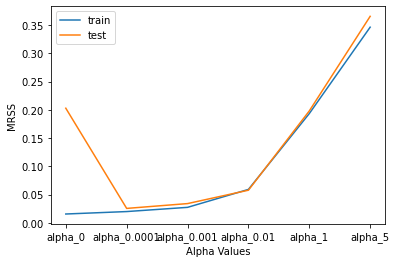

In [20]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

# Lasso Regularisation (L1)

In [21]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [22]:
#Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [23]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    
    # lasso model by default does NOT allows to train a model with 0 Learning rate, hence we use Linear Regression for that.
    if alpha == 0:
        lassoreg = LinearRegression(normalize=True)
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret

C:\Users\rkt7k\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7335671573239089, tolerance: 0.003983065126185541
  model = cd_fast.enet_coordinate_descent(
C:\Users\rkt7k\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7333330322072866, tolerance: 0.003983065126185541
  model = cd_fast.enet_coordinate_descent(
C:\Users\rkt7k\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5377192887698238, tolerance: 0.003983065126185541
  model = cd_fast.enet_coordinate_descent(
C:\Users\rkt7k\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

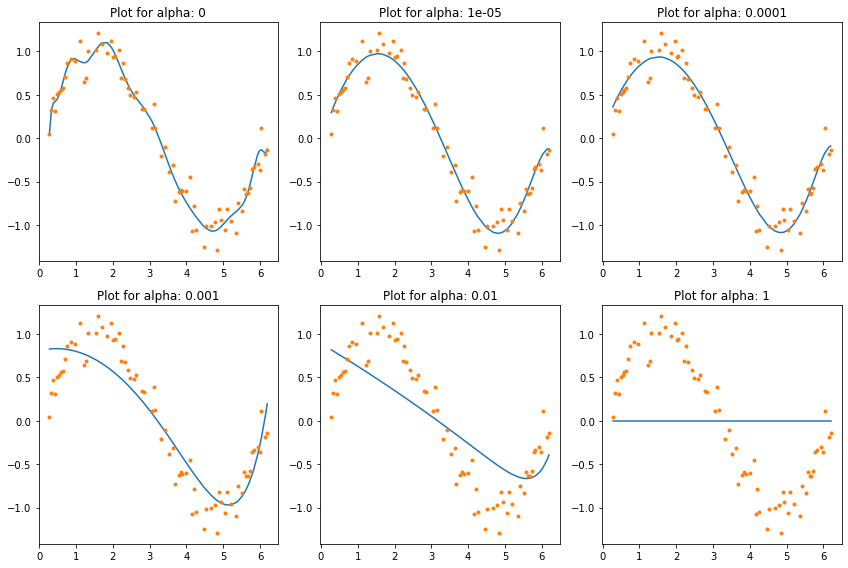

In [24]:
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

### Lasso Regression Results
> with `learning rate = 0` : There is no change in model, its same overfitted model, capturing noises

> with even a slight change in `learning rate =  1e-5` : the model is no longer capturing the noises and has learned the underlying relation of a sine curve

> with `increased learning rate`: model is gradually underfitting and eventually depecting a straight line.
>> NOTE : with increase in learning, after sometime, the plot is a straight line signifying ll variableshaven been reduced to absolute zero 0

In [25]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_1e-10,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-08,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-05,0.02,0.027,-0.041,1.3,-0.44,-0.0032,0.002,0.0004,4.8e-05,5e-06,4.3e-07,2.4e-08,0,-0,-1.4e-10,-3.8e-11,-7e-12,-1.2e-12
alpha_0.0001,0.022,0.027,0.071,1.1,-0.38,-0,0,0.00042,5.9e-05,5.4e-06,3.1e-07,0,0,0,-0,-0,-2.8e-12,-2.6e-12
alpha_0.001,0.08,0.072,0.81,0.11,-0.11,-0,-0,0,0,0,9.6e-07,7.1e-08,0,0,0,0,0,0
alpha_0.01,0.18,0.17,0.89,-0.25,-0.0088,-0,-0,-0,0,0,0,0,0,0,0,0,0,8.1e-13
alpha_1,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


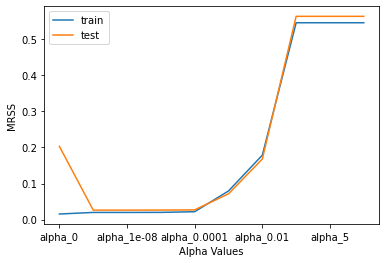

In [26]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [27]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0          0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      2
alpha_0.0001     7
alpha_0.001     11
alpha_0.01      12
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int32